In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
csv_folder = "/Users/onurserce/Desktop/server_mirror/"

dataframes = []

for file in os.listdir(csv_folder):
    if file.endswith(".csv") and "201000" not in file:
        print("appending", file)
        file_df = pd.read_csv(csv_folder+file, index_col=0)
        file_df["model"] = file.split("_")[1]
        dataframes.append(file_df)
        
df = pd.concat(dataframes, axis=0, ignore_index=True)

#df = df.sort_values(by=" Test error(px)", ascending=True)
df = df.sort_values(by="Test error with p-cutoff", ascending=True)
#df = df[df["Training iterations:"] != 50000]

df.head(10)

appending DLC_resnet152_dlc_realApr6shuffle12_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle22_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle6_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle14_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle7_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle15_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle4_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle20_200000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle23_200000-results.csv


,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff,model
31,200000,90,20,3.72,4.66,0.85,2.04,3.71,resnet152
27,200000,90,4,5.17,8.74,0.85,2.79,3.75,resnet152
30,150000,90,20,3.80,4.72,0.85,2.16,3.78,resnet152
26,150000,90,4,5.29,8.28,0.85,3.00,3.83,resnet152
25,100000,90,4,5.69,10.84,0.85,3.20,3.86,resnet152
24,50000,90,4,10.88,9.28,0.85,3.63,3.95,resnet152
17,100000,90,7,1.75,7.69,0.85,1.70,4.28,resnet152
10,150000,90,6,1.62,8.31,0.85,1.61,4.35,resnet152
9,100000,90,6,1.81,7.21,0.85,1.75,4.38,resnet152
29,100000,90,20,4.39,5.35,0.85,2.49,4.42,resnet152


In [3]:
df.drop(df.columns[[1, 3, 5, 6]], axis=1).groupby(["Shuffle number", "Training iterations:"]).describe()

Test error(px)                           \
                                              count   mean std    min    25%   
Shuffle number Training iterations:                                            
4              50000                            1.0   9.28 NaN   9.28   9.28   
               100000                           1.0  10.84 NaN  10.84  10.84   
               150000                           1.0   8.28 NaN   8.28   8.28   
               200000                           1.0   8.74 NaN   8.74   8.74   
6              50000                            1.0   9.91 NaN   9.91   9.91   
               100000                           1.0   7.21 NaN   7.21   7.21   
               150000                           1.0   8.31 NaN   8.31   8.31   
               200000                           1.0   8.26 NaN   8.26   8.26   
7              50000                            1.0   9.10 NaN   9.10   9.10   
               100000                           1.0   7.69 NaN   7.69   7.69   
               150000                           1.0   7.29 NaN   7.29   7.29   
               200000                           1.0   7.28 NaN   7.28   7.28   
12             50000                            1.0  12.16 NaN  12.16  12.16   
               100000                           1.0  11.41 NaN  11.41  11.41   
               150000                           1.0   8.99 NaN   8.99   8.99   
               200000                           1.0   8.29 NaN   8.29   8.29   
14             50000                            1.0   9.51 NaN   9.51   9.51   
               100000                           1.0   7.06 NaN   7.06   7.06   
               150000                           1.0   8.42 NaN   8.42   8.42   
               200000                           1.0   8.39 NaN   8.39   8.39   
15             50000                            1.0   9.99 NaN   9.99   9.99   
               100000                           1.0   8.77 NaN   8.77   8.77   
               150000                           1.0   9.24 NaN   9.24   9.24   
               200000                           1.0   9.26 NaN   9.26   9.26   
20             50000                            1.0   7.36 NaN   7.36   7.36   
               100000                           1.0   5.35 NaN   5.35   5.35   
               150000                           1.0   4.72 NaN   4.72   4.72   
               200000                           1.0   4.66 NaN   4.66   4.66   
22             50000                            1.0   6.61 NaN   6.61   6.61   
               100000                           1.0   6.11 NaN   6.11   6.11   
               150000                           1.0   5.84 NaN   5.84   5.84   
               200000                           1.0   5.76 NaN   5.76   5.76   
23             50000                            1.0   6.56 NaN   6.56   6.56   
               100000                           1.0   5.77 NaN   5.77   5.77   
               150000                           1.0   5.50 NaN   5.50   5.50   
               200000                           1.0   5.53 NaN   5.53   5.53   

                                                          \
                                       50%    75%    max   
Shuffle number Training iterations:                        
4              50000                  9.28   9.28   9.28   
               100000                10.84  10.84  10.84   
               150000                 8.28   8.28   8.28   
               200000                 8.74   8.74   8.74   
6              50000                  9.91   9.91   9.91   
               100000                 7.21   7.21   7.21   
               150000                 8.31   8.31   8.31   
               200000                 8.26   8.26   8.26   
7              50000                  9.10   9.10   9.10   
               100000                 7.69   7.69   7.69   
               150000                 7.29   7.29   7.29   
               200000                 7.28   7.28   7.28   
12             5

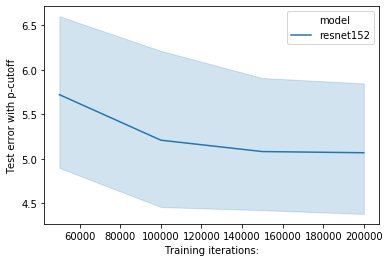

In [4]:
sns.lineplot(data=df, x="Training iterations:", y="Test error with p-cutoff", hue="model", style="model")

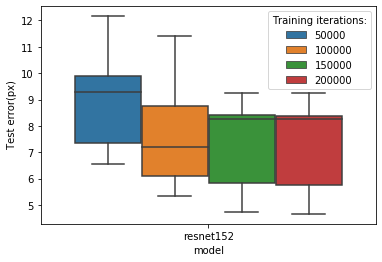

In [9]:
sns.boxplot(data=df, y=" Test error(px)", x="model", hue="Training iterations:")

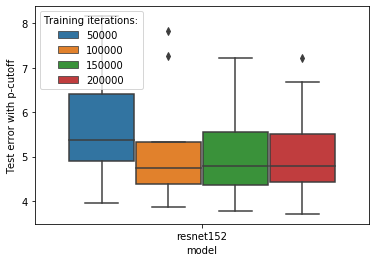

In [10]:
sns.boxplot(data=df, y="Test error with p-cutoff", x="model", hue="Training iterations:")

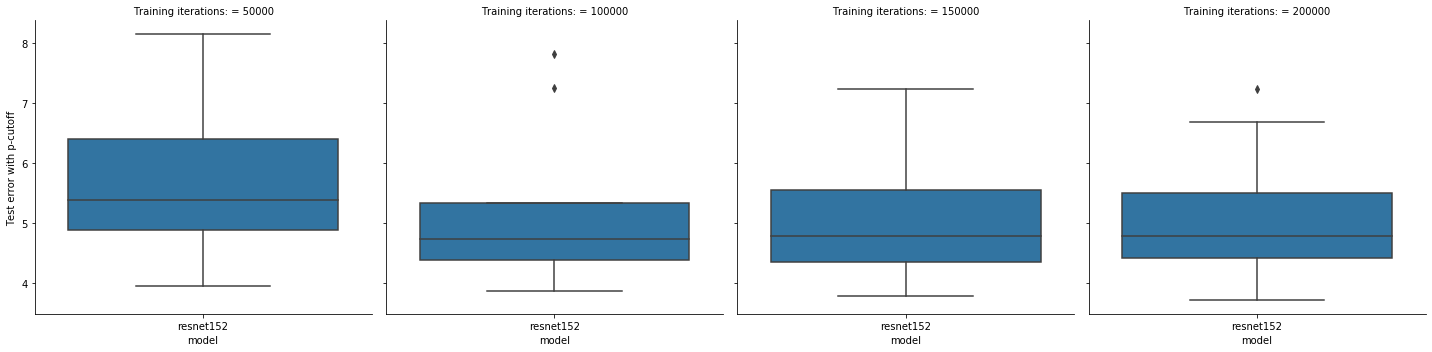

In [7]:
sns.catplot(data=df, y="Test error with p-cutoff", x="model", col="Training iterations:", kind="box")

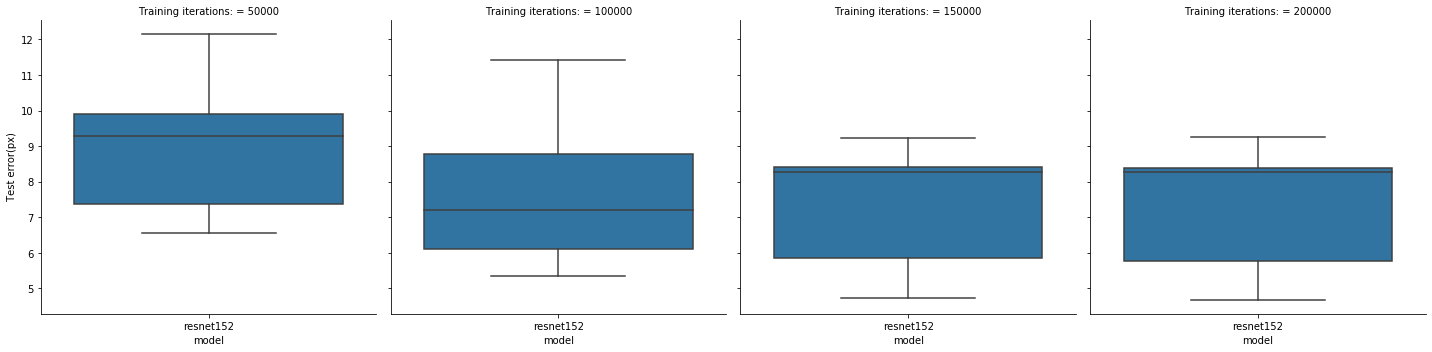

In [8]:
sns.catplot(data=df, y=" Test error(px)", x="model", col="Training iterations:", kind="box")

## Conclusion:

resnet50 performs the worst
resnet152 shuffle number 32 looks like an outlier.

**the most logical thing might be to proceed with the outlier extraction with all 3 shuffles of resnet152 and resnet101 models**